In [1]:
import numpy as np
%matplotlib_svg
import pylab as pl

### 多项式函数

In [2]:
a = np.array([1.0, 0, -2, 1])

In [3]:
p = np.poly1d(a)
print((type(p)))
p(np.linspace(0, 1, 5))     

<class 'numpy.lib.polynomial.poly1d'>


array([ 1.      ,  0.515625,  0.125   , -0.078125,  0.      ])

In [4]:
p + [-2, 1] # 和 p + np.poly1d([-2, 1]) 相同

poly1d([ 1.,  0., -4.,  2.])

In [5]:
p * p # 两个3次多项式相乘得到一个6次多项式

poly1d([ 1.,  0., -4.,  2.,  4., -4.,  1.])

In [6]:
p / [1, 1] # 除法返回两个多项式，分别为商式和余式

(poly1d([ 1., -1., -1.]), poly1d([ 2.]))

In [7]:
p == np.poly1d([ 1., -1., -1.]) * [1,1] + 2 

True

In [8]:
p.deriv()

poly1d([ 3.,  0., -2.])

In [9]:
p.integ()

poly1d([ 0.25,  0.  , -1.  ,  1.  ,  0.  ])

In [10]:
p.integ().deriv() == p

True

In [11]:
r = np.roots(p)
r

array([-1.61803399,  1.        ,  0.61803399])

In [12]:
p(r) # 将根带入多项式计算，得到的值近似为0

array([  2.33146835e-15,   1.33226763e-15,   1.11022302e-16])

In [13]:
np.poly(r)

array([  1.00000000e+00,  -1.66533454e-15,  -2.00000000e+00,
         1.00000000e+00])

In [14]:
np.polymul([1,1],[1,1]) 

array([1, 2, 1])

In [13]:
np.set_printoptions(suppress=True, precision=4)

x = np.linspace(-np.pi / 2, np.pi / 2, 1000)  # ❶
y = np.sin(x)  # ❷

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)  # ❸
    error = np.abs(np.polyval(a, x) - y)  # ❹
    print(("degree {}: {}".format(deg, a)))
    print(("max error of order %d:" % deg, np.max(error)))

degree 3: [-0.145  -0.      0.9887  0.    ]
max error of order 3: 0.00894699376707
degree 5: [ 0.0076 -0.     -0.1658 -0.      0.9998 -0.    ]
max error of order 5: 0.000157408614187
degree 7: [-0.0002 -0.      0.0083  0.     -0.1667 -0.      1.      0.    ]
max error of order 7: 1.52682558063e-06


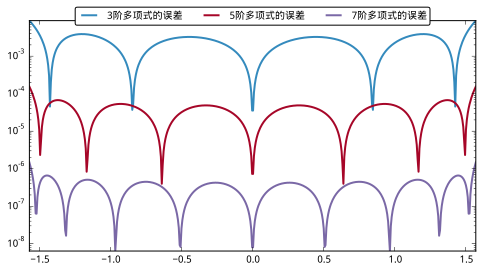

In [21]:
#%figonly=各阶多项式近似正弦函数的误差
pl.figure(figsize=(8, 4))

x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    pl.semilogy(x, error, label="{}阶多项式的误差".format(deg))
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=3, fancybox=True)
pl.axis('tight');

### 多项式函数类

In [2]:
from numpy.polynomial import Polynomial, Chebyshev
p = Polynomial([1, -2, 0, 1])
print((p(2.0)))

5.0


In [24]:
p.deriv()

Polynomial([-2.,  0.,  3.], [-1.,  1.], [-1.,  1.])

In [31]:
Chebyshev.basis(4).convert(kind=Polynomial)

Polynomial([ 1.,  0., -8.,  0.,  8.], [-1.,  1.], [-1.,  1.])

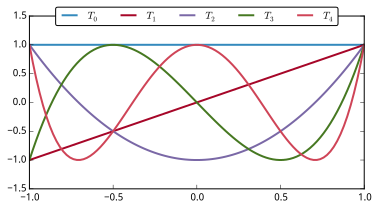

In [32]:
#%figonly=0到4次切比雪夫多项式
x = np.linspace(-1, 1, 100)
for i in range(5):
    ax = pl.plot(x, Chebyshev.basis(i)(x), lw=2, label="$T_%d$" % i)
pl.ylim(-1.5, 1.5)
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=5, fancybox=True);

In [76]:
def f(x):
    return 1.0 / ( 1 + 25 * x**2)

n = 11
x1 = np.linspace(-1, 1, n) #❶
x2 = Chebyshev.basis(n).roots() #❷
xd = np.linspace(-1, 1, 200)

c1 = Chebyshev.fit(x1, f(x1), n - 1, domain=[-1, 1]) #❸
c2 = Chebyshev.fit(x2, f(x2), n - 1, domain=[-1, 1])

print("插值多项式的最大误差：", end=' ')
print("等距离取样点：", abs(c1(xd) - f(xd)).max(), end=' ')
print("切比雪夫节点：", abs(c2(xd) - f(xd)).max())

插值多项式的最大误差： 等距离取样点： 1.91556933029 切比雪夫节点： 0.109149825014


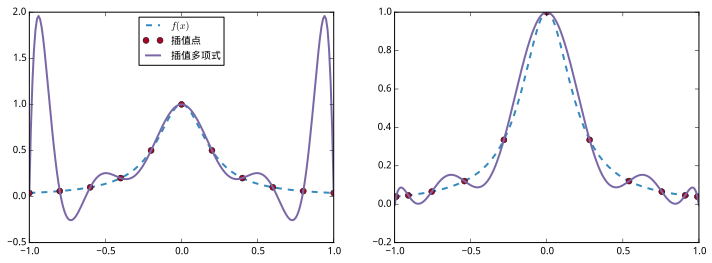

In [77]:
#%figonly=等距离插值点（左）、切比雪夫插值点（右）
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 4))
ax1.plot(xd, f(xd), "--", label="$f(x)$")
ax1.plot(x1, f(x1), "o", label="插值点")
ax1.plot(xd, c1(xd), label="插值多项式")

ax1.legend(loc="upper center")

ax2.plot(xd, f(xd), "--")
ax2.plot(x2, f(x2), "o")
ax2.plot(xd, c2(xd));

In [78]:
def g(x):
    x = (x - 1) * 5
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n).roots()
xd = np.linspace(-1, 1, 1000)

p_g = Polynomial.fit(x, g(x), n - 1, domain=[-1, 1])
c_g = Chebyshev.fit(x, g(x), n - 1, domain=[-1, 1])

print(("Max Polynomial Error:", abs(g(xd) - p_g(xd)).max()))
print(("Max Chebyshev Error:", abs(g(xd) - c_g(xd)).max()))

Max Polynomial Error: 1.19560558744
Max Chebyshev Error: 6.47575726376e-09


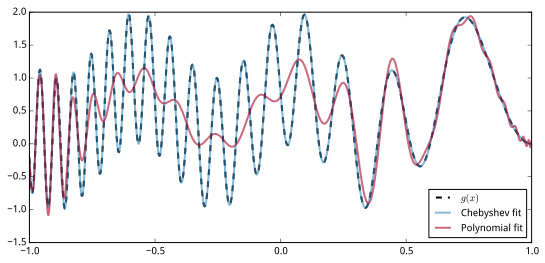

In [79]:
#%figonly=Chebyshev插值与Polynomial插值比较
pl.figure(figsize=(9, 4))
pl.plot(xd, g(xd), "k--", label="$g(x)$")
pl.plot(xd, c_g(xd), alpha=0.6, label="Chebyshev fit")
pl.plot(xd, p_g(xd), alpha=0.6, label="Polynomial fit")
pl.legend(loc="best");

In [80]:
c_trimed = c_g.trim(tol=0.05)
print(("degree:", c_trimed.degree()))
print(("error:", abs(g(xd) - c_trimed(xd)).max()))

degree: 68
error: 0.0912094835458


In [81]:
def h(x):
    x = 5 * x
    return np.exp(-x**2 / 10)

n = 20
x = Chebyshev.basis(n).roots()
c_h = Chebyshev.fit(x, h(x), n - 1, domain=[-1, 1])

print(("Max Chebyshev Error:", abs(h(xd) - c_h(xd)).max()))

Max Chebyshev Error: 1.66544267266e-09


In [82]:
c_diff = c_g - c_h
roots = c_diff.roots()
real_roots = roots[roots.imag == 0].real
print((np.allclose(c_diff(real_roots), 0)))

True


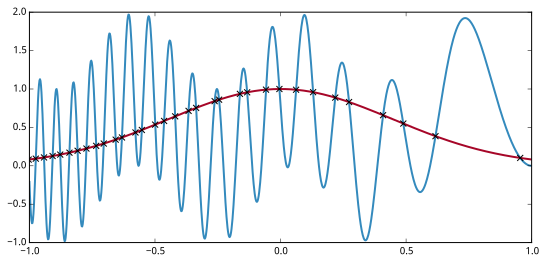

In [83]:
#%figonly=使用Chebyshev插值计算两条曲线在[-1, 1]之间的所有交点
pl.figure(figsize=(9, 4))
pl.plot(xd, g(xd))
pl.plot(xd, h(xd))
pl.plot(real_roots, h(real_roots), "kx", markeredgewidth=1)
pl.xlim(-1, 1);

In [97]:
def g2(x):
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n, domain=[-10, 0]).roots() #❶
xd = np.linspace(-10, 0, 1000)

c_g2 = Chebyshev.fit(x, g2(x), n - 1, domain=[-10, 0]) #❷

print(("Max Chebyshev Error:", abs(g2(xd) - c_g2(xd)).max())) #❸

Max Chebyshev Error: 6.47574571744e-09
